In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Identification of variables and data type

In [2]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
# Analysing the basic metric
df.describe(include=[np.number])

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [6]:
df.describe(include=[np.object])

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,9,39,110,9,179
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,727,507,190,619,412,281,1072,121


In [7]:
# Analysing Null Values
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
# Drop the feature
df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype('int')
df['Weight'] = df['Weight'].str.replace('kg', '').astype('float')

### Exploratory Data Analysis

#### Univariate Analysis

<AxesSubplot:>

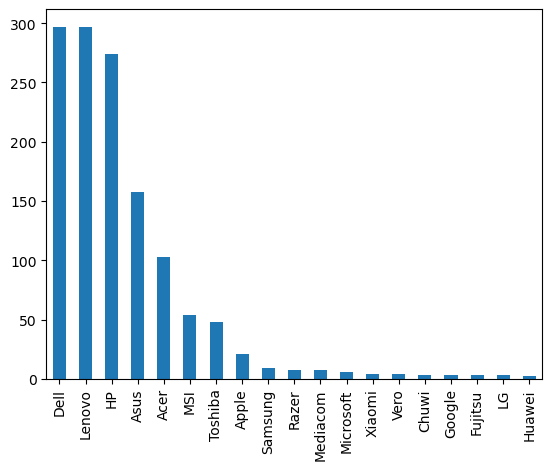

In [10]:
df['Company'].value_counts().plot(kind='bar')

<AxesSubplot:>

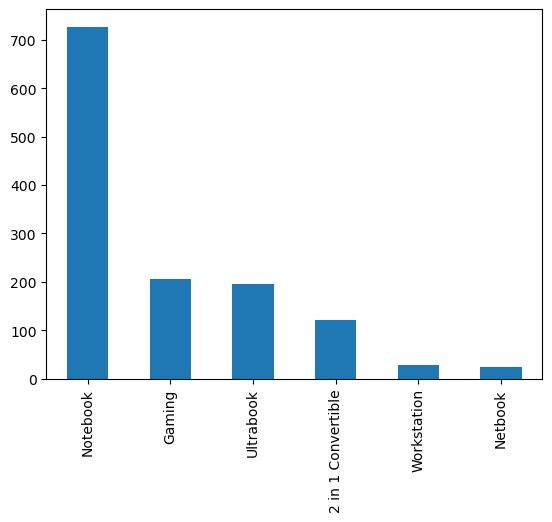

In [11]:
df['TypeName'].value_counts().plot(kind='bar')

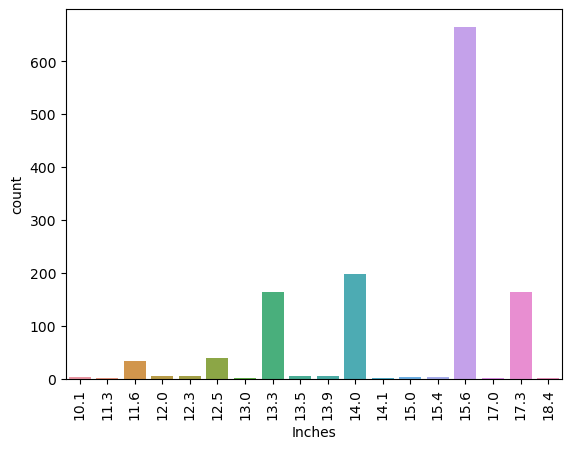

In [12]:
sns.countplot(x=df['Inches'])

plt.xticks(rotation='vertical')
plt.show()

##### Observation 
- Most of the laptops have screen size of 15.6 inches

<AxesSubplot:xlabel='Ram', ylabel='count'>

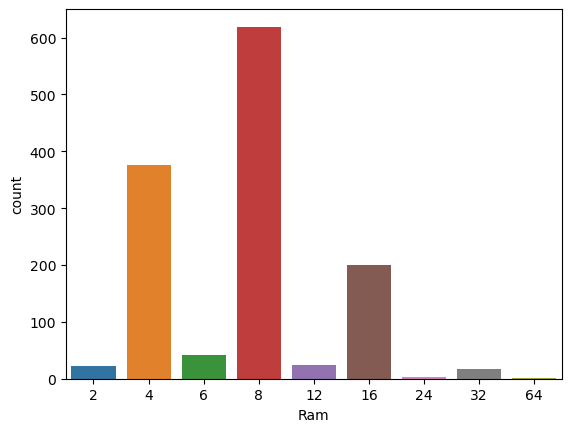

In [13]:
sns.countplot(x= df['Ram'])

##### Observation 
- Most of the laptops have ram of 8 GB.

<AxesSubplot:ylabel='Density'>

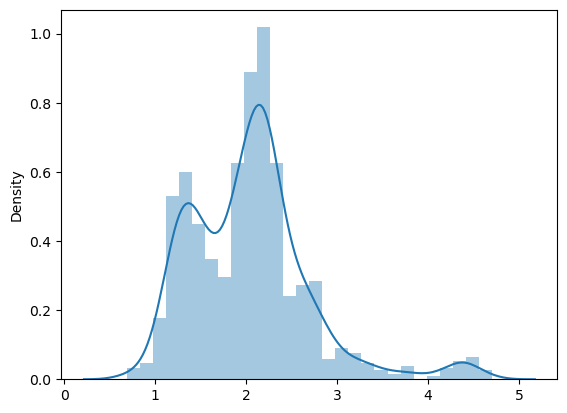

In [14]:
sns.distplot(x = df['Weight'])

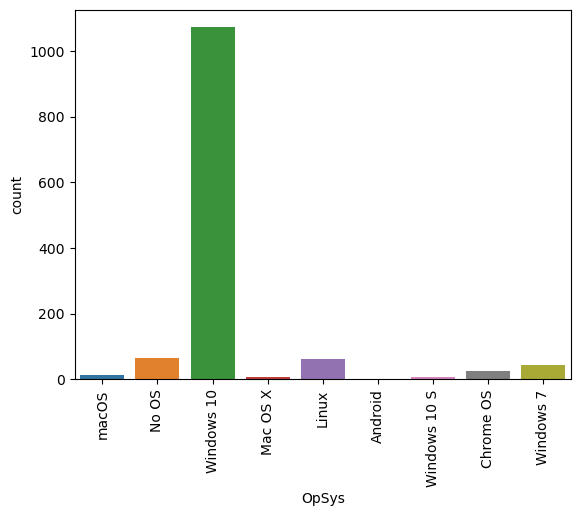

In [15]:
sns.countplot(x= df['OpSys'])

plt.xticks(rotation = 'vertical')
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

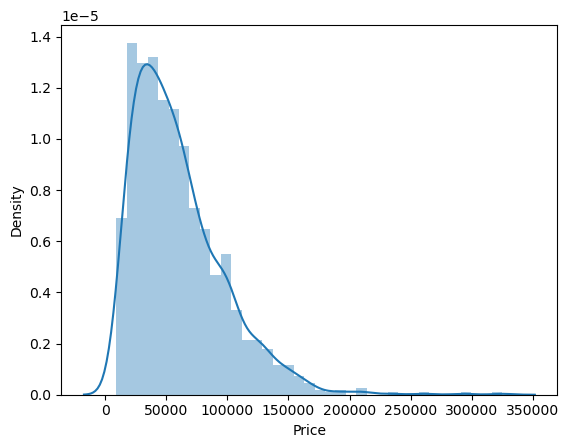

In [16]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

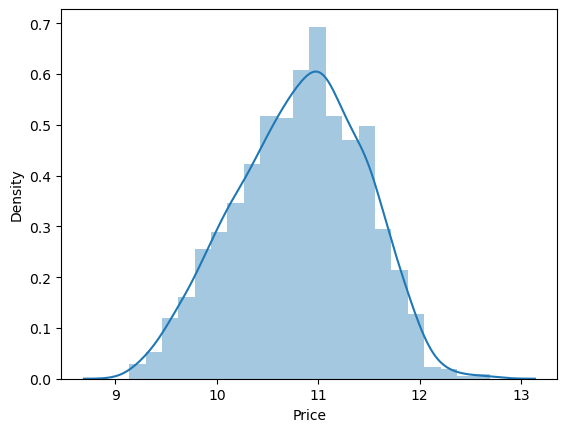

In [17]:
sns.distplot(np.log(df['Price']))

#### Bivariate Analysis

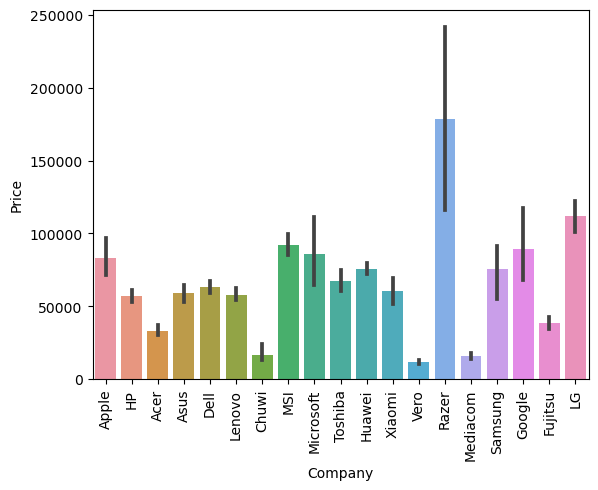

In [18]:
sns.barplot(x=df['Company'],y=df['Price'])

plt.xticks(rotation='vertical')
plt.show()

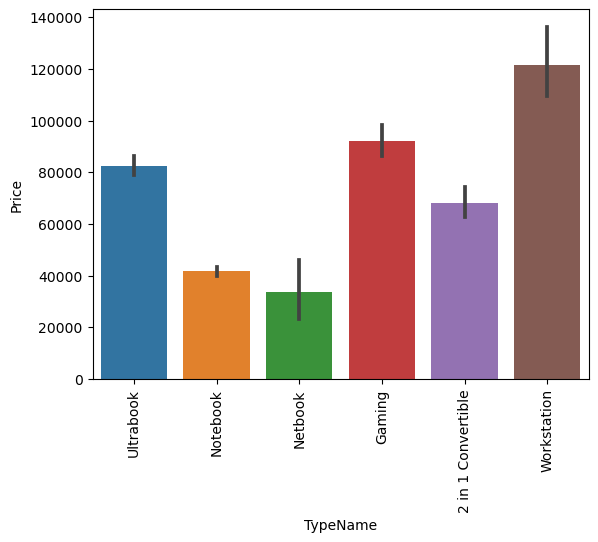

In [19]:
sns.barplot(x=df['TypeName'],y=df['Price'])

plt.xticks(rotation='vertical')
plt.show()

##### Observation:
- Prices depends on the type of laptop

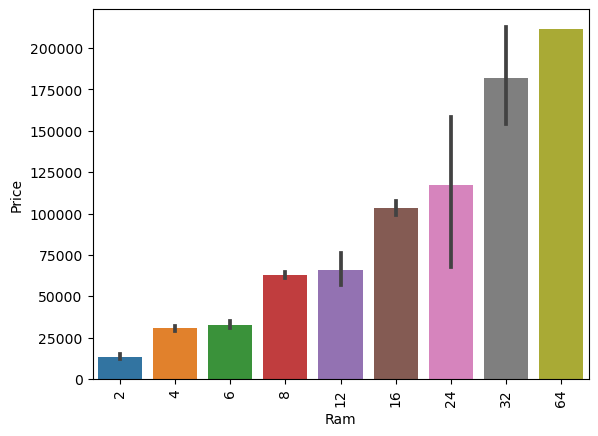

In [20]:
sns.barplot(x=df['Ram'],y=df['Price'])

plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Weight', ylabel='Price'>

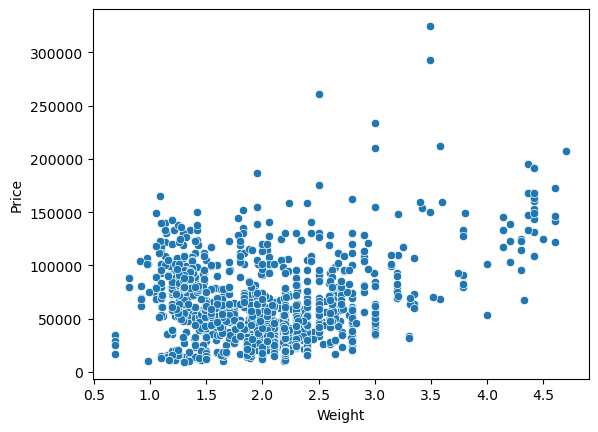

In [21]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

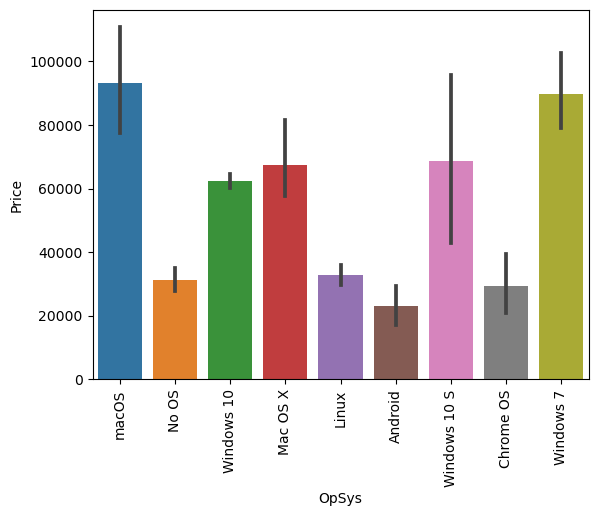

In [22]:
sns.barplot(x=df['OpSys'],y=df['Price'])

plt.xticks(rotation='vertical')
plt.show()

### Feature Engineering

In [23]:
# Create a new feature as a touchscreen and IPS display
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [24]:
# Create a new feature as a Pixel per Inches(ppi)
df['X_res'] = df['ScreenResolution'].str.findall(r'\d+').str.get(0).astype('int')
df['Y_res'] = df['ScreenResolution'].str.findall(r'\d+').str.get(1).astype('int')

df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5 / df['Inches']).astype('float')

In [25]:
# Create a new feature as type_CPU
df['CPU Type'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
        
df['CPU Brand'] = df['CPU Type'].apply(fetch_processor)

In [26]:
# Creating a new features as SSD, HDD, Flash Drive and Hybrid

# Clean and preprocess the 'Memory' column
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

# Split the 'Memory' column into two parts based on '+'
new = df["Memory"].str.split("+", n=1, expand=True)

# Extract and process the first memory part
df["first"] = new[0]
df["first"] = df["first"].str.strip()

# Extract and process the second memory part
df["second"] = new[1]

# Create binary flags for memory types in the first part
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Extract numeric values from the first part
df['first'] = df['first'].str.replace(r'\D', '')

# Fill missing values in the second part with "0"
df["second"].fillna("0", inplace=True)

# Create binary flags for memory types in the second part
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Extract numeric values from the second part
df['second'] = df['second'].str.replace(r'\D', '')

# Convert the first and second parts to integers
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# Calculate the values for HDD, SSD, Hybrid, and Flash Storage based on the binary flags and numeric values
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Drop the intermediate columns and binary flags
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)


In [27]:
# Creating new feature as a GPU Brand
df['GPU_Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

df = df[df['GPU_Brand'] != 'ARM'] # Drop the row where GPU_Brand = 'ARM' 

In [28]:
# Creating new features from OpSys
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return inp
    elif inp == 'macOS' or inp == 'Mac OS X':
        return inp
    else:
        return 'Others/No OS/Linux'
    
df['OS'] = df['OpSys'].apply(cat_os)

In [29]:
# Dropping all the non-important features
df.drop(columns= ['Inches', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys', 'X_res', 'Y_res', 'CPU Type', 'Flash_Storage', 'Hybrid'], inplace=True)

<AxesSubplot:>

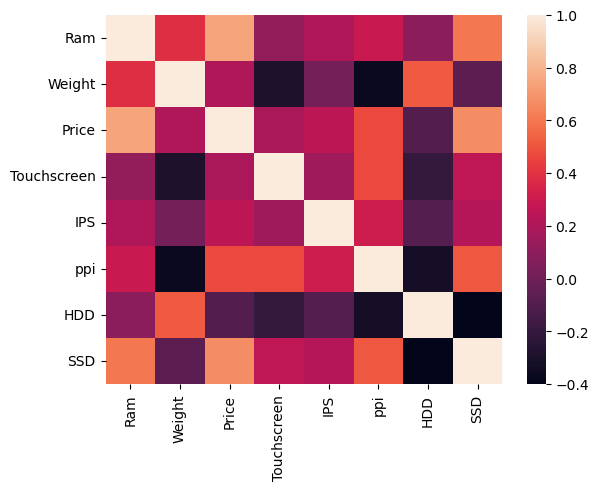

In [30]:
sns.heatmap(df.corr())

### Model Building

In [31]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1041, 12) (1041,)
(261, 12) (261,)


In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [34]:
X_train.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'IPS', 'ppi',
       'CPU Brand', 'HDD', 'SSD', 'GPU_Brand', 'OS'],
      dtype='object')

#### Linear Regression

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Create a pipeline with one-hot encoding and linear regression
pipeline = Pipeline([('col_transform', ColumnTransformer(
        transformers=[('one_hot', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 9, 10, 11])], remainder='passthrough')),
        ('linear_reg', LinearRegression()) ])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate and print the evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8096590291595737
MAE: 0.20312486274047276


In [36]:
pipeline[1].coef_

array([ 1.14350986e+10,  8.10224526e-02, -3.18196625e-01,  1.33473396e-01,
        1.27617359e-01,  4.18043137e-01,  1.55854225e-01,  7.29484558e-02,
        4.63737011e-01,  8.70740414e-02,  1.99631214e-01, -1.96224689e-01,
        4.29965496e-01,  2.00555027e-01,  3.10174108e-01,  2.85735846e-01,
       -4.97337580e-01,  1.84780240e-01,  6.88821077e-03, -2.13278055e-01,
       -1.83159113e-01,  4.61459160e-03,  3.91568244e-01,  7.68084526e-02,
        3.47362518e-01,  4.10116911e-01, -1.34780765e-01, -2.16094911e-01,
       -1.62222862e-01, -2.41189986e-01,  1.69997334e-01,  3.58204722e-01,
        1.37982303e+00,  2.75571465e-01,  3.98423195e-01,  5.59051752e-01,
        5.44096112e-01,  9.78696346e-02,  8.99968147e-02,  1.14350986e+10,
        1.14350986e+10,  1.14350986e+10,  1.14350986e+10, -2.70164490e-01,
        2.88807750e-02,  6.78884983e-02, -5.94455004e-02,  4.51012850e-02,
        2.51132250e-03,  6.44922256e-05])

In [37]:
pipeline[1].intercept_

-11435098638.50185

#### Ridge Regression

In [38]:
from sklearn.linear_model import Ridge

# Create a pipeline with one-hot encoding and Ridge regression
pipeline = Pipeline([('col_transform', ColumnTransformer(
        transformers=[('one_hot', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 9, 10, 11])], remainder='passthrough')),
        ('linear_reg', Ridge(alpha=1.5)) ])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate and print the evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8099110739885075
MAE: 0.2009845556818928


#### Lasso Regression

In [39]:
from sklearn.linear_model import Lasso

# Create a pipeline with one-hot encoding and Lasso
pipeline = Pipeline([('col_transform', ColumnTransformer(
        transformers=[('one_hot', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 9, 10, 11])], remainder='passthrough')),
        ('linear_reg', Lasso(alpha=0.0001)) ])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate and print the evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.8099545563392465
MAE: 0.20208745710363357
